In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlcourse/medium_posts.csv
/kaggle/input/mlcourse/weights_heights.csv
/kaggle/input/mlcourse/hostel_factors.csv
/kaggle/input/mlcourse/affairs.csv
/kaggle/input/mlcourse/accidental-deaths-in-usa-monthly.csv
/kaggle/input/mlcourse/adult.data.csv
/kaggle/input/mlcourse/samsung_train.txt
/kaggle/input/mlcourse/mlbootcamp5_train.csv
/kaggle/input/mlcourse/flight_delays_test.csv
/kaggle/input/mlcourse/websites_train_sessions.csv
/kaggle/input/mlcourse/microchip_tests.txt
/kaggle/input/mlcourse/samsung_test.txt
/kaggle/input/mlcourse/telecom_churn.csv
/kaggle/input/mlcourse/titanic_train.csv
/kaggle/input/mlcourse/video_games_sales.csv
/kaggle/input/mlcourse/winequality-white.csv
/kaggle/input/mlcourse/ads_hour.csv
/kaggle/input/mlcourse/beauty.csv
/kaggle/input/mlcourse/site_dic.pkl
/kaggle/input/mlcourse/websites_test_sessions.csv
/kaggle/input/mlcourse/currency.csv
/kaggle/input/mlcourse/flight_delays_train.csv
/kaggle/input/mlcourse/adult_train.csv
/kaggle/input/mlcourse/sam

In [2]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)


In [3]:
df = pd.read_csv("/kaggle/input/mlcourse/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df_charge = df[['Total eve charge', 'Total day charge', 'Total night charge', 'Total intl charge']]
df_charge['Total Charge'] = df['Total eve charge'] + df['Total day charge'] + df['Total night charge'] + df['Total intl charge']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

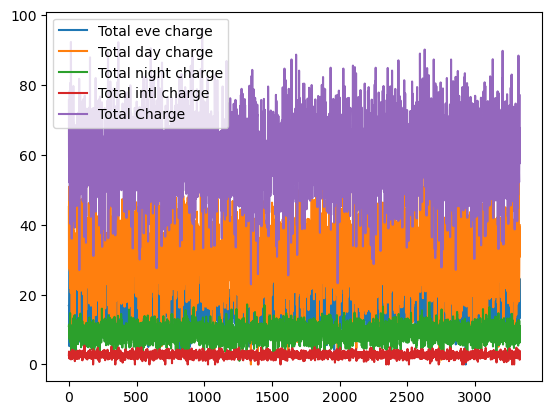

In [5]:
df_charge.plot()

In [6]:
df[df['Churn'] == 1].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


In [7]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494823

In [8]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

In [9]:
df.loc[0:5, "State" : "Voice mail plan"] #inclusive rows and columns

,State,Account length,Area code,International plan,Voice mail plan
0,KS,128,415,No,Yes
1,OH,107,415,No,Yes
2,NJ,137,415,No,No
3,OH,84,408,Yes,No
4,OK,75,415,Yes,No
5,AL,118,510,Yes,No


Loc Method is used for indexing by name.
iloc Method is used for indexing by number.

In [10]:
df.iloc[0:5, 0:5]

,State,Account length,Area code,International plan,Voice mail plan
0,KS,128,415,No,Yes
1,OH,107,415,No,Yes
2,NJ,137,415,No,No
3,OH,84,408,Yes,No
4,OK,75,415,Yes,No


In [11]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                      True
dtype: object

To apply functions to each column, use apply()
To apply functions to each row, specify axis = 1.

In [12]:
df[df['State'].apply(lambda state : state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,False
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True


In [13]:
d = {'No' : False, 'Yes' : True}
df['Voice mail plan'] = df['Voice mail plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
d = {'No' : False, 'Yes' : True}
df = df.replace({'Voice mail plan' : d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
df.groupby(['Churn'])[columns_to_show].describe()

Total day minutes                                                    \
                  count    mean    std  min     25%    50%     75%    max   
Churn                                                                       
False            2850.0  175.18  50.18  0.0  142.83  177.2  210.30  315.6   
True              483.0  206.91  69.00  0.0  153.25  217.6  265.95  350.8   

      Total eve minutes          ...                Total night minutes  \
                  count    mean  ...     75%    max               count   
Churn                            ...                                      
False            2850.0  199.04  ...  233.20  361.8              2850.0   
True              483.0  212.41  ...  249.45  363.7               483.0   

                                                           
         mean    std   min     25%     50%     75%    max  
Churn                                                      
False  200.13  51.11  23.2  165.90  200.25  234.90  395.0  
True   205.23  47.13  47.4  171.25  204.80  239.85  354.9  

[2 rows x 24 columns]

df.groupby(by=grouping_columns)[columns_to_show].function()

1. First, the groupby method divides the grouping_columns by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (columns_to_show). If columns_to_show is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

In [16]:
df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
False            175.18  50.18  0.0  315.6            199.04  50.29   0.0   
True             206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
False  361.8              200.13  51.11  23.2  395.0  
True   363.7              205.23  47.13  47.4  354.9